In [1]:
# import the libraries
import pandas as pd
import time

# pip install swifter
import swifter

# Read the data

In [2]:
filename_url = 'https://raw.githubusercontent.com/CarlosJun/Data-Science/master/Dashboard/voila_basic/data/sales_data.csv'
#filename_url = 'data/sales_data.csv'

df_tmp = pd.read_csv(filename_url, index_col=0)

df_tmp.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [3]:
# make a copy to modify after
df = df_tmp.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   City              185950 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 12.8+ MB


In [15]:
# duplicate the database for future tests
df = df.append(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743800 entries, 0 to 371899
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          743800 non-null  int64  
 1   Product           743800 non-null  object 
 2   Quantity Ordered  743800 non-null  int64  
 3   Price Each        743800 non-null  float64
 4   Order Date        743800 non-null  object 
 5   Purchase Address  743800 non-null  object 
 6   Month             743800 non-null  int64  
 7   City              743800 non-null  object 
 8   period            743800 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 56.7+ MB


In [17]:
# reset the index to avoid problem
df = df.reset_index(drop=True)

# Problem

**Problem:** create one variable with 'AM' and 'PM' information

## Apply X Swifter

In [77]:
## https://docs.python.org/3/library/time.html
#time.strptime(df.loc[0, 'Order Date'], '%m/%d/%y %H:%M')

In [5]:
def define_period(str_datetime, format_time='%m/%d/%y %H:%M'):
    
    try:
        obj_datetime = time.strptime(str_datetime, format_time)
    except:
        return 'undefined'
    
    if obj_datetime.tm_hour < 12:
        return 'AM'
    else:
        return 'PM'

In [18]:
%%time
df['period'] = df.apply(lambda row: define_period(row['Order Date']), axis=1)

CPU times: user 9.68 s, sys: 43.1 ms, total: 9.73 s
Wall time: 9.73 s


In [19]:
%%time
df['period'] = df.swifter.apply(lambda row: define_period(row['Order Date']), axis=1)

Dask Apply:   0%|          | 0/48 [00:00<?, ?it/s]

CPU times: user 4.87 s, sys: 288 ms, total: 5.16 s
Wall time: 7.56 s


## Using pandas to_datetime

In [ ]:
import datetime

In [50]:
df['datetime'] = pd.to_datetime(df['Order Date'])

In [26]:
df.loc[df['datetime'].dt.time < datetime.time(hour=12), 'period'] = 'AM'
df.loc[df['datetime'].dt.time >= datetime.time(hour=12), 'period'] = 'PM'

Let's add noisy to the dataset

In [47]:
df = df_tmp.copy()

In [48]:
df.loc[1500, 'Order Date'] = '26/26/19 17:14'

In [53]:
df.loc[1500]

Order ID                                            177986
Product                           Apple Airpods Headphones
Quantity Ordered                                         1
Price Each                                           150.0
Order Date                                  26/26/19 17:14
Purchase Address    281 Center St, New York City, NY 10001
Month                                                    4
City                                   New York City  (NY)
datetime                                               NaT
Name: 1500, dtype: object

In [ ]:
# use parameter 'errors' to deal with the noisy
df['datetime'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Runtime benchmark 

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [150]:
num_exec = 7

df = df_tmp.copy()

exec_pandas = np.zeros(num_exec)
exec_swifter = np.zeros(num_exec)
dataset_len = np.zeros(num_exec)
    
for i in range(num_exec):
    
    dataset_len[i] = len(df)
    
    start_time = time.time()
    df['period'] = df.apply(lambda row: define_period(row['Order Date']), axis=1)
    exec_pandas[i] = time.time() - start_time
    
    start_time = time.time()
    df['period'] = df.swifter.apply(lambda row: define_period(row['Order Date']), axis=1)
    exec_swifter[i] = time.time() - start_time
    
    # double the dataset size
    df = df.append(df)
    # reset the index
    df = df.reset_index(drop=True)

Dask Apply:   0%|          | 0/48 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/48 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/48 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/48 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/48 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/48 [00:00<?, ?it/s]

Dask Apply:   0%|          | 0/48 [00:00<?, ?it/s]

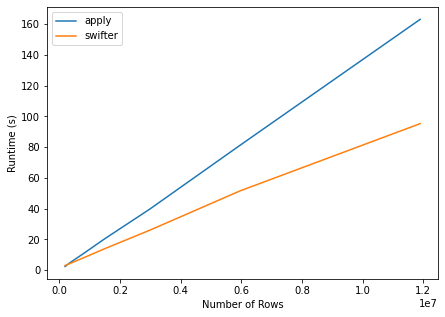

In [151]:
plt.figure(figsize=(7,5))

plt.plot(dataset_len, exec_pandas, label='apply')
plt.plot(dataset_len, exec_swifter, label='swifter')

plt.ylabel('Runtime (s)')
plt.xlabel('Number of Rows')
plt.legend()

plt.show()